In [1]:
print("Hello")

Hello


In [2]:
tickers = "AAPL,MSFT,GOOGL"
weights = "0.3,0.4,0.3"

In [3]:
tickers = tickers.split(',')
weights = [float(w) for w in weights.split(',')]
print(tickers, '\n', weights)

['AAPL', 'MSFT', 'GOOGL'] 
 [0.3, 0.4, 0.3]


In [6]:
!pip install yfinance

  Using cached yfinance-0.2.38-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached peewee-3.17.3.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.38-py2.py3-none-any.whl (72 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 813.4 kB/s eta 0:00:00 0:00:01
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 12.2 MB/s eta 0:00:0000:0100:01
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=854126 sha256=e6d7e4d3cd6a6a538a3c139fc4b80e6cda9bf6192d

In [7]:
import yfinance as yf

def fetch_stock_data(tickers, start_date=None):
    """
    Fetch historical stock data for the given tickers and start date.
    
    Args:
        tickers (list): List of stock tickers.
        start_date (str): Start date for data fetching.
        
    Returns:
        tuple: Historical stock prices and index values.
    """
    if start_date is None:
        start_date = "2018-01-01"
    stock_data = yf.download(tickers, start=start_date, end=None)
    stock_prices = stock_data['Adj Close']
    index_data = yf.download("^GSPC", start=start_date, end=None)
    index_values = index_data['Adj Close']
    return stock_prices, index_values


In [8]:
import datetime
start_date = datetime.date(2018, 1, 1)
start_date

datetime.date(2018, 1, 1)

In [9]:
stock_prices, index_values = fetch_stock_data(tickers, start_date)

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
import matplotlib.pyplot as plt

In [13]:
stock_prices.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2018-01-02,40.670979,53.660500,80.080925
2018-01-03,40.663883,54.576000,80.453583
2018-01-04,40.852779,54.787998,81.161728
2018-01-05,41.317909,55.514500,82.167976
2018-01-08,41.164429,55.710499,82.251816


<Axes: xlabel='Date'>

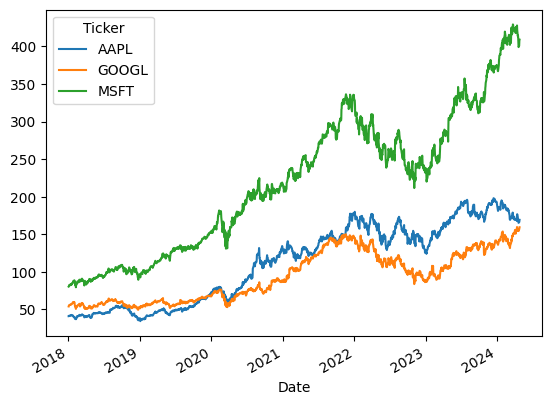

In [12]:
stock_prices.plot()

In [15]:
stock_prices.isna().sum()

Ticker
AAPL     0
GOOGL    0
MSFT     0
dtype: int64

In [ ]:
# !pip install cvxpy

In [18]:
# portfolio_optimization.py
import numpy as np
import cvxpy as cp 

In [28]:
index_values.values.shape, stock_prices.values.shape

((1588,), (1588, 3))

In [ ]:
optimized_weights_cvxpy = solve_quadratic_optimization_cvxpy(stock_prices.values, index_values.values)

In [30]:
"""
Solves the quadratic optimization problem using cvxpy to find the optimal weights for index replication.

Parameters:
- X (ndarray): Design matrix representing historical data of shape (T, n), where T is the number of time points
    and n is the number of assets (stocks).
- y (ndarray): Target vector representing the returns of the index to be replicated, of length T.

Returns:
- w_star (ndarray): Optimal solution vector representing the weights of the portfolio,
    such that the portfolio mimics the index as closely as possible.
"""
X = stock_prices.values
y = index_values.values

T, n = X.shape

# Define the optimization variable representing the portfolio weights
w = cp.Variable(n)
# print(w)
# # Define the objective function to minimize the squared error between replicated and actual index returns
objective = cp.Minimize((1/T) * cp.norm(X @ w - y)**2)

# # Define the constraints:
# # - Non-negativity constraint on the weights
# # - Constraint to ensure the weights sum up to 1 (standard simplex constraint)
constraints = [w >= 0, cp.sum(w) == 1]

# # Formulate the quadratic optimization problem
# problem = cp.Problem(objective, constraints)

# # Solve the optimization problem
# problem.solve()

# # Get the optimal solution (portfolio weights)
# w_star = w.value

var109


In [31]:
def solve_quadratic_optimization_cvxpy(X, y):
    """
    Solves the quadratic optimization problem using cvxpy to find the optimal weights for index replication.

    Parameters:
    - X (ndarray): Design matrix representing historical data of shape (T, n), where T is the number of time points
      and n is the number of assets (stocks).
    - y (ndarray): Target vector representing the returns of the index to be replicated, of length T.

    Returns:
    - w_star (ndarray): Optimal solution vector representing the weights of the portfolio,
      such that the portfolio mimics the index as closely as possible.
    """
    T, n = X.shape

    # Define the optimization variable representing the portfolio weights
    w = cp.Variable(n)

    # Define the objective function to minimize the squared error between replicated and actual index returns
    objective = cp.Minimize((1/T) * cp.norm(X @ w - y)**2)

    # Define the constraints:
    # - Non-negativity constraint on the weights
    # - Constraint to ensure the weights sum up to 1 (standard simplex constraint)
    constraints = [w >= 0, cp.sum(w) == 1]

    # Formulate the quadratic optimization problem
    problem = cp.Problem(objective, constraints)

    # Solve the optimization problem
    problem.solve()

    # Get the optimal solution (portfolio weights)
    w_star = w.value

    return w_star


In [36]:
np.random.seed(42)
T, n = 100, 5
X = np.random.randn(T, n)  # Example design matrix (historical data)
y = np.random.randn(T)    



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:
# Generate synthetic data for testing
np.random.seed(42)
T, n = 100, 5
X = np.random.randn(T, n)  # Example design matrix (historical data)
y = np.random.randn(T)     # Example target vector (index returns)

# Solve the quadratic optimization problem to find the optimal portfolio weights
w_star = solve_quadratic_optimization_cvxpy(X, y)

# Display the optimal solution (portfolio weights)
print("Optimal Solution Vector (Portfolio Weights):")
print(w_star)


Optimal Solution Vector (Portfolio Weights):
[0.25996121 0.25467058 0.08939503 0.28395395 0.11201924]


/home/codespace/.python/current/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [39]:
import numpy as np
import cvxpy as cp

def solve_quadratic_optimization(X, y):
    """
    Solves the quadratic optimization problem to find the optimal weights for index replication.

    Parameters:
    - X (ndarray): Design matrix representing historical data of shape (T, n), where T is the number of time points
      and n is the number of assets (stocks).
    - y (ndarray): Target vector representing the returns of the index to be replicated, of length T.

    Returns:
    - w_star (ndarray): Optimal solution vector representing the weights of the portfolio,
      such that the portfolio mimics the index as closely as possible.
    """
    T, n = X.shape

    # Define the optimization variable representing the portfolio weights
    w = cp.Variable(n)

    # Define the objective function to minimize the squared error between replicated and actual index returns
    objective = cp.Minimize((1/T) * cp.norm(X @ w - y)**2)

    # Define the constraints:
    # - Non-negativity constraint on the weights
    # - Constraint to ensure the weights sum up to 1 (standard simplex constraint)
    constraints = [w >= 0, cp.sum(w) == 1]

    # Formulate the quadratic optimization problem
    problem = cp.Problem(objective, constraints)

    # Solve the optimization problem
    problem.solve()

    # Get the optimal solution (portfolio weights)
    w_star = w.value

    return w_star

In [43]:
# from cvxpy import minimize

w_star = solve_quadratic_optimization(np.array(stock_prices.values), np.array(index_values.values))

# Display the optimal solution (portfolio weights)
print("Optimal Solution Vector (Portfolio Weights):")
print(w_star)

Optimal Solution Vector (Portfolio Weights):
None


/home/codespace/.python/current/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/home/codespace/.python/current/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [46]:
stock_prices.values.shape

(1588, 3)

In [48]:
np.random.seed(42)
T, n = 100, 5
X = np.random.randn(T, n)  # Example design matrix (historical data)
y = np.random.randn(T)   

X.shape, y.shape

((100, 5), (100,))